# Praktikum 9 | Pengolahan Citra

## Image Noise (manual & OpenCV version)

Fadhil Yori Hibatullah | 
2103161037 | 
2 D3 Teknik Informatika B

---------------------------------------

### Import Dependency

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import random

### Load Image

In [2]:
imgNormal = imageio.imread("gambar4.jpg")

### Show Image

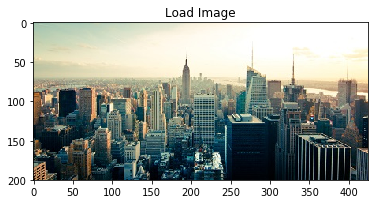

In [3]:
plt.imshow(imgNormal)
plt.title("Load Image")
plt.show()

---------------------

## To Grayscale

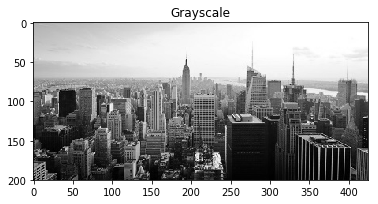

In [4]:
imgGrayscale = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(0, imgNormal.shape[0]):
    for x in range(0, imgNormal.shape[1]):
        r = imgNormal[y][x][0]
        g = imgNormal[y][x][1]
        b = imgNormal[y][x][2]
        gr = ( int(r) + int(g) + int(b) ) / 3
        imgGrayscale[y][x] = (gr, gr, gr)
        
plt.imshow(imgGrayscale)
plt.title("Grayscale")
plt.show()

---------------------

## Noise Gaussian

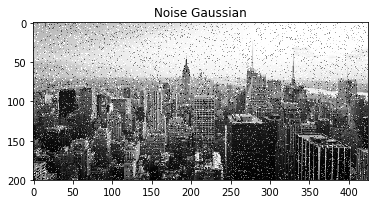

In [5]:
imgNoiseGaussian = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

# Add noise
for y in range(0, imgNormal.shape[0]):
    for x in range(0, imgNormal.shape[1]):
        xg = imgGrayscale[y][x][0]
        xb = xg
        nr = random.randint(0,100)
        if nr < 20:
            ns = random.randint(0,256) - 128
            xb = int(xg + ns)
            if xb < 0:
                xb = -xb
            if xb > 255:
                xb = 255
        imgNoiseGaussian[y][x] = (xb, xb, xb)

plt.imshow(imgNoiseGaussian)
plt.title("Noise Gaussian")
plt.show()

----------------------

## Noise Speckle

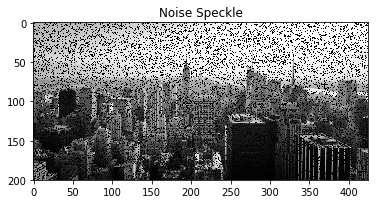

In [6]:
imgNoiseSpeckle = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

# Add noise
for y in range(0, imgNormal.shape[0]):
    for x in range(0, imgNormal.shape[1]):
        xg = imgGrayscale[y][x][0]
        xb = xg
        nr = random.randint(0,100)
        if nr < 20:
            xb = 0
        imgNoiseSpeckle[y][x] = (xb, xb, xb)

plt.imshow(imgNoiseSpeckle)
plt.title("Noise Speckle")
plt.show()

----------------------

## Noise Salt and Pepper

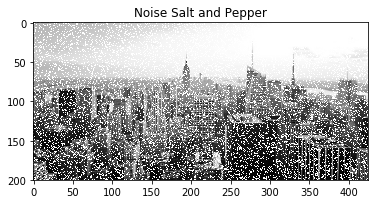

In [7]:
imgNoiseSaltPepper = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

# Add noise
for y in range(0, imgNormal.shape[0]):
    for x in range(0, imgNormal.shape[1]):
        xg = imgGrayscale[y][x][0]
        xb = xg
        nr = random.randint(0,100)
        if nr < 20:
            xb = 255
        imgNoiseSaltPepper[y][x] = (xb, xb, xb)

plt.imshow(imgNoiseSaltPepper)
plt.title("Noise Salt and Pepper")
plt.show()

---------------------

# OpenCV Version

In [8]:
import cv2

## Load image

In [9]:
imgcvNormal = cv2.imread('gambar4.jpg')

## Funct convert from BGR to RGB

In [10]:
def bgrToRgb(imgBGR):
    imgRGB = np.zeros((imgBGR.shape[0], imgBGR.shape[1], 3), dtype=np.uint8)

    for y in range(0, imgBGR.shape[0]):
        for x in range(0, imgBGR.shape[1]):
            r = imgBGR[y][x][2]
            g = imgBGR[y][x][1]
            b = imgBGR[y][x][0]
            imgRGB[y][x] = (r, g, b)
            
    return imgRGB

## Display image

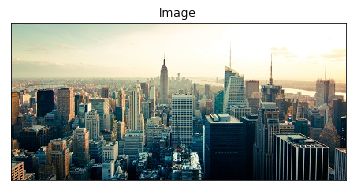

In [11]:
imgcvNormalRGB = bgrToRgb(imgcvNormal)
plt.imshow(imgcvNormalRGB)
plt.title("Image")
plt.xticks([]), plt.yticks([])
plt.show()

## To Grayscale

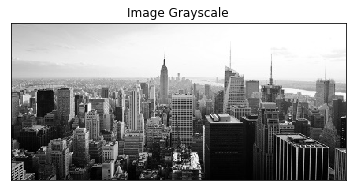

In [12]:
imgcvGrayscale = cv2.cvtColor(imgcvNormal, cv2.COLOR_BGR2GRAY)

plt.imshow(imgcvGrayscale, cmap='gray')
plt.title("Image Grayscale")
plt.xticks([]), plt.yticks([])
plt.show()

## Add noise gauss

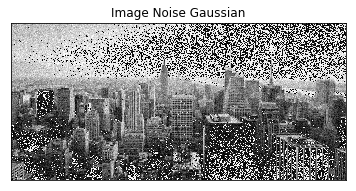

In [13]:
noise_gauss = np.zeros(imgcvGrayscale.shape)
cv2.randn(noise_gauss, 0, 20)
noise_gauss = noise_gauss.reshape(imgcvGrayscale.shape)
imgcvNoiseGauss = imgcvGrayscale + noise_gauss

plt.imshow(imgcvNoiseGauss.astype('uint8'), cmap='gray')
plt.title("Image Noise Gaussian")
plt.xticks([]), plt.yticks([])
plt.show()

## Add noise speckle

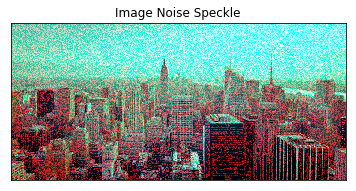

In [14]:
noise_speckle = np.zeros(imgNormal.shape)
row,col,ch = imgGrayscale.shape
cv2.randn(noise_speckle, row, col)
noise_speckle = noise_speckle.reshape(imgGrayscale.shape)
imgcvNoiseSpeckle = imgNormal + imgNormal * noise_speckle

plt.imshow(imgcvNoiseSpeckle.astype('uint8'))
plt.title("Image Noise Speckle")
plt.xticks([]), plt.yticks([])
plt.show()